## COVID-19: Paraíba 2020-2022

### Integrantes:

* [João Henrique de Araújo Pereira](https://github.com/joaoh224488)&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;Matrícula: 20210026705 
* [Maria Raquel Souza Martinez](https://github.com/maria-raquel)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp; Matrícula: 20200025900
* [Maxwel de Andrade Barbosa](https://github.com/maxbarbosa)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp; Matrícula: 20210067083



<p align="center"><img src="https://www.camara.leg.br/midias/image/2020/10/img20201022140139807-768x512.jpg" width="70%" height="70%"/></p>

Fonte: https://www.camara.leg.br/midias/image/2020/10/img20201022140139807-768x512.jpg

## Introdução e objetivos

### Objetivo geral:



### Objetivos específicos:

### Bibliotecas utilizadas:

As bibliotecas usadas no projeto estão contidas no arquivo `requirements.txt` presente no diretório raiz [deste trabalho](https://github.com/maxbarbosa/data-science-final-project).

Elas podem ser instaladas através da execução da instrução abaixo dentro do programa de linha de comando do seu sistema operacional:

    pip install -r requirements.txt


### Importação das bibliotecas e carregamento dos dados:

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import fix_vaxs
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.cluster import KMeans
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = "ticks", rc = custom_params)

vax_df      =  pd.read_csv("datasets/dados_vacinacao.csv")
casos_br_df =  pd.read_csv("datasets/dados_br.csv")
casos_pb_df =  pd.read_csv("datasets/dados_pb.csv")

### Dados:

Para nossas análises, usaremos três datasets.

O primeiro tem informações sobre todas as doses individuais de vacinas contra a covid-19 aplicadas pelo SUS no Estado da Paraíba, disponibilizado pelo Ministério da Saúde no site do [openDataSUS](https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao). Cada entrada desse dataset tem informações sobre o paciente (como idade, sexo e etnia) e sobre a dose (como a fabricante e o município de aplicação). Para mais informações, temos um [dicionário](https://github.com/maxbarbosa/data-science-final-project/blob/main/datasets/dicionario-de-dados-vacinacao.pdf) neste repositório explicando todas as colunas.

In [5]:
vax_df.head(3)

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,paciente_id
0,44,1977-04-18,M,1,BRANCA,ARAPIRACA,57510,PATOS,912,Médico,9,Trabalhadores de Saúde,2021-11-11,Reforço,87,COVID-19 PFIZER - COMIRNATY,f9495cb04daf5adb495d22c9c88b31883f191fb762ab27...
1,5,2016-11-18,M,1,BRANCA,PARELHAS,None,CAMPINA GRANDE,207,Pessoas de 5 a 11 anos,0,NaN,2022-02-07,1ª Dose,99,COVID-19 PEDIÁTRICA - PFIZER COMIRNATY,52288faace8c986872faca7101868ae8a23fefd435cd51...
2,39,1982-01-23,F,99,SEM INFORMACAO,CAMPINA GRANDE,58410,CAMPINA GRANDE,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-07-16,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,0ffaed327aac7fe8abf0b35471b0b1fa60f9fc48ff7d9c...



O segundo dataset que usaremos tem informações sobre a da COVID-19 em todos os municípios da Paraíba. Cada linha representa um município paraibano e cada coluna tem informações sobre a pandemia neste município. Elas são:

* city (nome do município)
* confirmed (quantidade bruta de casos confirmados)
* deaths (quantidade bruta de mortes pela COVID-19)
* estimated_population (população estimada do município)
* confirmed_per_100k_inhabitants (casos confirmados a cada 100 mil habitantes)
* death_rate (taxa de mortalidade, razão entre as quantidades brutas de casos e de mortes)

Esse dataset foi encontrado no site [Brasil IO](https://brasil.io/covid19/PB/), um blog de programadores voluntários que coletavam e organizavam os dados da COVID-19 de cada Secretária Estadual de Saúde e compilavam em uma base de dados única e de fácil acesso. No entanto, esse dataset parou de ser atualizado, e os dados mais recentes da pandemia na Paraíba são do dia 22/08/21.

In [6]:
casos_pb_df.head(3)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-08-22,PB,Água Branca,city,1128,14,True,10306,2500106,10945.08054,0.0124
1,2021-08-22,PB,Aguiar,city,528,5,True,5630,2500205,9378.33037,0.0095
2,2021-08-22,PB,Alagoa Grande,city,4117,72,True,28439,2500304,14476.59904,0.0175


Por fim, o terceiro dataset que usaremos é semelhante ao segundo, encontrado também no Brasil IO, porém ele inclui todos os municípios brasileiros, ao contrário de só os paraibanos. Ele será usado para fins de comparação entre o cenário da pandemia na Paraíba e o cenário nacional.

In [7]:
casos_br_df.head(3)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-26,PI,Acauã,city,228,2,True,7102.0,2200053.0,3210.36328,0.0088
1,2022-03-26,PI,Agricolândia,city,829,10,True,5131.0,2200103.0,16156.69460,0.0121
2,2022-03-26,PI,Água Branca,city,1702,77,True,17470.0,2200202.0,9742.41557,0.0452


## Pré-processamento

O dataset disponibilizado pelo Open Data SUS possui algumas células com vírgulas a mais, que ocasionam um erro de leitura do arquivo csv no Python. Só é possível corrigí-lo através de um processo pseudo-manual, cujo passo a passo está detalhado [nesse arquivo](https://github.com/maxbarbosa/data-science-final-project/tree/main/datasets#readme) do repositório.


O dataset original possui 2.806.755 linhas e 32 colunas. Dessas colunas, removemos 15 que não serão utilizadas nessa análise.

Dessas colunas, removemos 15 que não serão utilizadas nessa análise, através dp código abaixo explicitado abaixo:


```python
import pandas as pd
df = pd.read_csv('dados_vacinacao.csv')

df = df.drop(
        ['document_id',  
        'paciente_endereco_coIbgeMunicipio', 
        'paciente_endereco_coPais',
        'paciente_endereco_nmPais',
        'paciente_endereco_uf', 
        'paciente_nacionalidade_enumNacionalidade', 
        'estabelecimento_valor',
        'estabelecimento_razaoSocial', 
        'estalecimento_noFantasia',
        'estabelecimento_municipio_codigo', 
        'estabelecimento_uf', 
        'vacina_fabricante_nome',
        'vacina_fabricante_referencia', 
        'sistema_origem'], 
	axis= 1
)

df = df.iloc[: , [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16, 0]]

df.to_csv("dados_vacinacao.csv", index = False)
```


Feito isso, algumas colunas do novo dataset gerado foram criadas com o tipo _float_, porém elas seriam melhor representadas pelo tipo _int_. Para realizar a conversão de tipo, o seguinte trecho de código foi executado:

```python
df.paciente_idade = df.paciente_idade.fillna(0)
df.paciente_racaCor_codigo = df.paciente_racaCor_codigo.fillna(0)
df.vacina_grupoAtendimento_codigo = df.vacina_grupoAtendimento_codigo.fillna(0)
df.vacina_categoria_codigo = df.vacina_categoria_codigo.fillna(0)
df.vacina_codigo = df.vacina_codigo.fillna(0)

df = df.astype({
    "paciente_idade":int,
    "paciente_racaCor_codigo":int,
    "vacina_grupoAtendimento_codigo":int,
    "vacina_categoria_codigo": int,
    "vacina_codigo": int
    })

df.to_csv("dados_vacinacao.csv", index = False)
```

## Limpeza dos dados

### Quanto às idades


Durante o decorrer da exploração inicial do dataset vax_df, encontramos valores negativos na coluna que armazena a idade dos pacientes. Também encontramos valores de idade que ultrapassam 110, alguns chegam a 121 anos.

Como a quantidade desses valores anômalos é baixa (79 casos), convém deletá-los. A remoção desses dados não afetará relevantemente este estudo, pois esse número é insignificante se comparado as quase 3 milhões de entradas totais do dataset.


In [140]:
idades_negativas = pd.DataFrame(vax_df.paciente_idade [vax_df.paciente_idade < 0])
idades_negativas.count()

paciente_idade    10
dtype: int64

In [141]:
idades_acima115 = pd.DataFrame(vax_df.paciente_idade [vax_df.paciente_idade > 110])
idades_acima115.count()

paciente_idade    69
dtype: int64

In [142]:
vax_df = vax_df[vax_df.paciente_idade >= 0]
vax_df = vax_df[vax_df.paciente_idade <= 110]

### Quanto aos fabricantes das vacinas

Verificamos também a presença de duplicidade para o nome do fabricante das vacinas, a exemplo de "_COVID-19 SINOVAC/BUTANTAN - CORONAVAC_" e "_COVID-19 SINOVAC - CORONAVAC_" que implicam o mesmo produto, porém estão tipadas com nomes diferentes. 

In [143]:
vax_names = pd.DataFrame({"vacina_nome": vax_df.vacina_nome.sort_values().unique()})
vax_names

,vacina_nome
0,COVID-19 ASTRAZENECA - ChAdOx1-S
1,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
2,COVID-19 JANSSEN - Ad26.COV2.S
3,COVID-19 PEDIÁTRICA - PFIZER COMIRNATY
4,COVID-19 PFIZER - COMIRNATY
5,COVID-19 SINOVAC - CORONAVAC
6,COVID-19 SINOVAC/BUTANTAN - CORONAVAC


Removeremos a duplicação do nome das vacinas, através da uma função rename_vax, escrita no arquivo fix_vax.py

In [144]:
fix_vaxs.rename_vax(vax_df)
fix_vaxs.update_vax_code(vax_df)

In [145]:
vax_names = pd.DataFrame({"vacina_nome": vax_df.vacina_nome.sort_values().unique()})
vax_names

,vacina_nome
0,ASTRAZENECA
1,CORONAVAC
2,JANSEN
3,PFIZER
4,PFIZER PEDIÁTRICA


### Quanto às descrições das doses

Ainda na exploração inicial, notamos a presença de redundancias para a descrição das doses aplicadas, a exemplo de 'Dose Inicial' e '1ª Dose' que implicam o mesmo sentido, porém estão tipadas com nomes diferentes.

In [146]:
vax_dose = pd.DataFrame({"vacina_descricao_dose": vax_df.vacina_descricao_dose.sort_values().unique()})
vax_dose


,vacina_descricao_dose
0,1ª Dose
1,2ª Dose
2,2ª Dose Revacinação
3,2º Reforço
4,3ª Dose
5,4ª Dose
6,Dose
7,Dose Adicional
8,Dose Inicial
9,Reforço


Removendo a duplicação da descrição das doses aplicadas, através da função rename_doses.

In [147]:
fix_vaxs.rename_doses(vax_df)

In [148]:
vax_dose = pd.DataFrame({"vacina_descricao_dose": vax_df.vacina_descricao_dose.sort_values().unique()})
vax_dose


,vacina_descricao_dose
0,1ª Dose
1,2ª Dose
2,2º Reforço
3,Dose única
4,Reforço


## Exploração inicial

### Analisando medidas de centralidade e dispersão

Faremos isso para o dataset casos_pb_df, variável a variável.

#### Casos confirmados por município

Armazenados na coluna `confirmed`

In [153]:
casos_pb_df['confirmed'].describe()

count       223.000000
mean       1930.986547
std        7639.848374
min          60.000000
25%         362.500000
50%         655.000000
75%        1295.000000
max      103940.000000
Name: confirmed, dtype: float64

Usando a função describe, calculamos rapidamente algumas medidas de centralidade e dispersão para a quantidade de casos de cada município.

Vemos que a média de casos por município é 1930,98, porém o desvio padrão é 7639,84.

Podemos também observar que a diferença entre o valor mínimo, o primeiro quartil e o segundo quartil são próximas, em torno de 300 casos. A diferença entre o segundo quartil e o terceiro quartil é o dobro disso, quase 600. Já a diferença entre o terceiro quartil e o valor máximo é mais de 10.000 casos. Com isso, podemos especular que o valor máximo representa um outlier, ou que poucos municípios (menos de 25%) concentram a maior quantidade de casos de COVID-19 no estado.

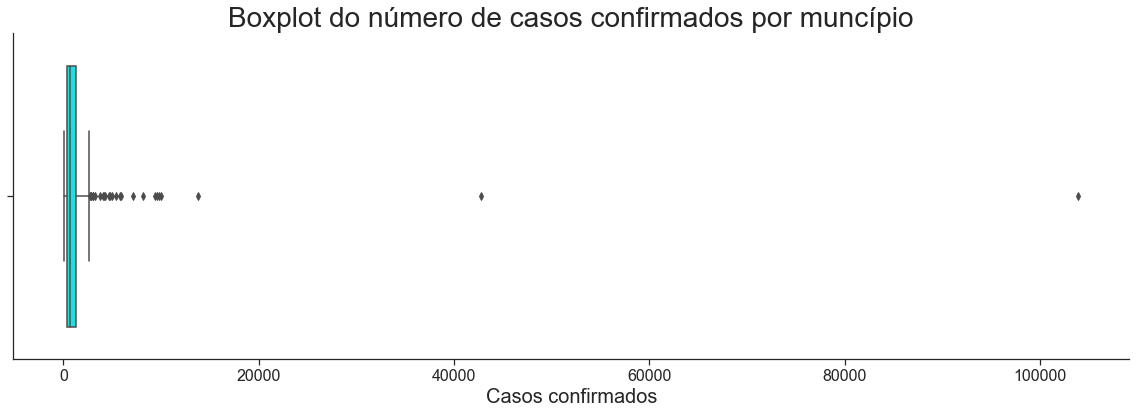

In [155]:
ax = sns.boxplot(data = casos_pb_df , x = 'confirmed', color='cyan')
ax.set_title('Boxplot do número de casos confirmados por muncípio', fontsize=28)
ax.figure.set_size_inches(20,6)
ax.set_xlabel('Casos confirmados', fontsize=20)
ax.tick_params(labelsize=16)

In [156]:
casos_pb_df[casos_pb_df['confirmed'] > 40000]

,date,city,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,pib_per_capita,n_vaccinations,demographic_density
49,2021-08-22,CAMPINA GRANDE,42778,1084,411807,10387.87587,0.0253,23210.44,266264,648.31
93,2021-08-22,JOAO PESSOA,103940,2890,817511,12714.20201,0.0278,25768.09,593097,3421.28


O boxplot que representa a distribuição dos casos por município é extremamente achatado. Isso ocorre pois os dois maiores municípios do Estado, João Pessoa e Campina Grande, concentram muitos mais casos que os demais municípios. Além disso, mesmo não os levando em conta, ainda temos muitos casos outliers além deles. Isso nos mostra que os casos de covid no Estado da Paraíba não estão distribuídos uniformemente entre os municípios, e sim concentrados em focos. 

### Mortes por COVID-19 confirmadas por município

Armazenados na coluna `deaths`

In [157]:
casos_pb_df['deaths'].describe()

count     223.000000
mean       40.973094
std       208.290704
min         0.000000
25%         6.000000
50%        11.000000
75%        25.000000
max      2890.000000
Name: deaths, dtype: float64

Similarmente à quantidade de casos, a média de mortes por municípios tem média baixa, 40,97, porém desvio padrão alto, 208,29. 

Observamos que os valores mínino, e de primeiro, segundo e terceiro quartil são próximos (0, 6, 11 e 25 respectivamente), porém o valor máximo apresenta um salto enorme (2890). Vimos que poucos municípios concentram mais casos e consequentemente devem concentrar mais mortes, mas talvez outro fator para esse fenômeno possa ser o fato que municípios menores têm menos estrutura hospitalar para lidar com casos mais graves da doença, e é comum vermos esses pacientes serem transportados para municípios maiores para melhor tratamento. Dessa forma, caso o paciente venha a óbito, talvez ele seja registrado na capital, por exemplo, ao invés do seu município de origem, inflando mais esses números.

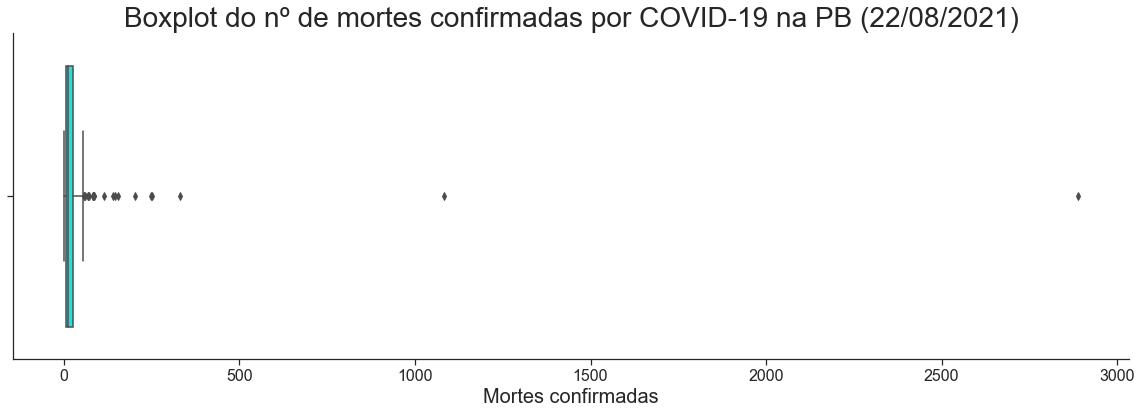

In [158]:
ax = sns.boxplot(data = casos_pb_df , x = 'deaths', color = 'cyan')
ax.set_title('Boxplot do nº de mortes confirmadas por COVID-19 na PB (22/08/2021)', fontsize = 28)
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('Mortes confirmadas', fontsize = 20)
ax.tick_params(labelsize = 16)

In [159]:
casos_pb_df[casos_pb_df['deaths'] > 1000]

,date,city,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,pib_per_capita,n_vaccinations,demographic_density
49,2021-08-22,CAMPINA GRANDE,42778,1084,411807,10387.87587,0.0253,23210.44,266264,648.31
93,2021-08-22,JOAO PESSOA,103940,2890,817511,12714.20201,0.0278,25768.09,593097,3421.28


Novamente vemos um gráfico boxplot achatado, mostrando que, tal qual os casos de COVID-19, as mortes da doença também se concentram em poucos municípios outliers.

### População estimada

Armazenados na coluna `estimated_population`

In [160]:
casos_pb_df.estimated_population.describe()

count       223.000000
mean      18113.349776
std       62236.235680
min        1758.000000
25%        4551.500000
50%        7286.000000
75%       15363.000000
max      817511.000000
Name: estimated_population, dtype: float64

Observando as medidas de centralidade dos dados de população dos municípios paraibanos, vemos novamente o comportamento apresentado nas variáveis anteriores: média baixa, desvio padrão alto, valores de primeiro, segundo e terceiro quartil próximos com um salto muito grande entre o último e o valor máximo. Isso nos mostra que grande parte da população do estado encontra-se concentrada em poucos municípios.

Isso nos mostra que ocorre uma grande concentração de casos e mortes em poucos municípios pois existe essa concentração populacional.

Podemos observar isso melhor no gráfico boxplot da variável.

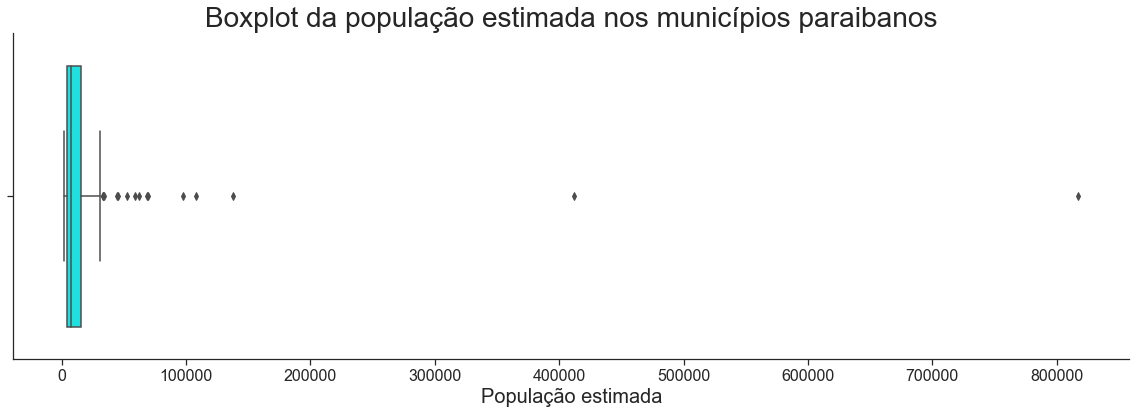

In [161]:
ax = sns.boxplot(data = casos_pb_df , x = 'estimated_population', color = 'cyan')
ax.set_title('Boxplot da população estimada nos municípios paraibanos', fontsize = 28)
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('População estimada', fontsize = 20)
ax.tick_params(labelsize = 16)

### Casos confirmados a cada 100 mil habitantes por município

Armazenados na coluna `confirmed_per_100k_inhabitants`

In [162]:
casos_pb_df.confirmed_per_100k_inhabitants.describe()

count      223.000000
mean      9242.325208
std       3524.619628
min       1623.815970
25%       6626.868160
50%       8836.278760
75%      11430.389445
max      18192.675160
Name: confirmed_per_100k_inhabitants, dtype: float64

Quando calculamos as medidas de centralidade da quantidade de casos relativas à população de cada município, podemos fazer análises mais pontuais, que não são distorcidas pela diferença populacional. Vemos que esses dados são bem menos dispersos que os dados em quantidades absolutas.

A média de mortes a cada 100 mil habitantes é 9242.32, o desvio padrão é 3524.61, os quartis são 6626.86, 8836.27 e 11430.38. Os valores mínimo e máximo são 1623.81 e 18192.67. 

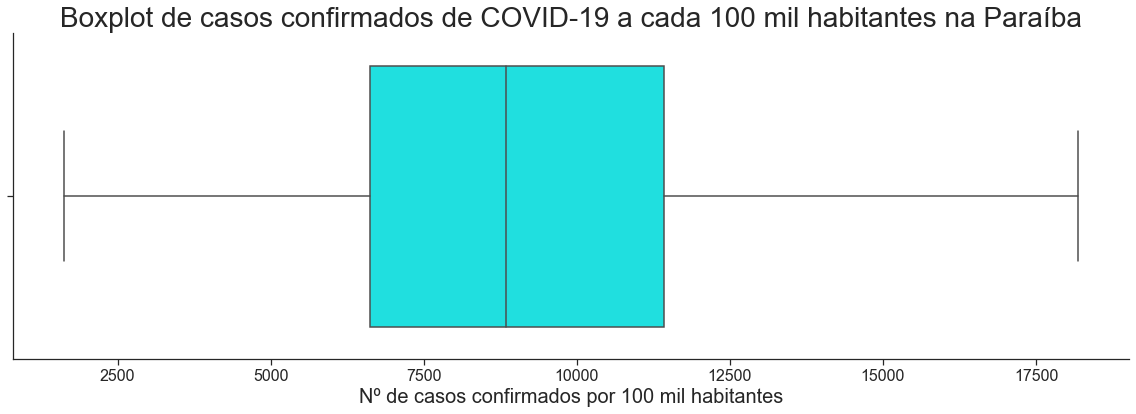

In [163]:
ax = sns.boxplot(data = casos_pb_df , x = 'confirmed_per_100k_inhabitants', color = 'cyan')
ax.set_title('Boxplot de casos confirmados de COVID-19 a cada 100 mil habitantes na Paraíba', fontsize = 28)
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('Nº de casos confirmados por 100 mil habitantes', fontsize = 20)
ax.tick_params(labelsize = 16)

O boxplot dessa váriavel é muito mais legível do que o das variáveis anteriores.

### Mortalidade da COVID-19 por município

Razão entre a quantidade absoluta de mortes e a quantidade absoluta de casos. Armazenados na coluna  `death_rate`

In [164]:
casos_pb_df.death_rate.describe()

count    223.000000
mean       0.018596
std        0.009877
min        0.000000
25%        0.012100
50%        0.017200
75%        0.022750
max        0.066700
Name: death_rate, dtype: float64

A mortalidade média é de 0.018, o desvio padrão é 0.0098. Os quartis são 0.012, 0.017 e 0.022. O valor máximo é 0.066. 

Vemos um salto muito grande do terceiro quartil para o valor máximo. Os valores quartis ficam todos próximos à média, porém o valor máximo é 3.6 vezes maior que ela. 

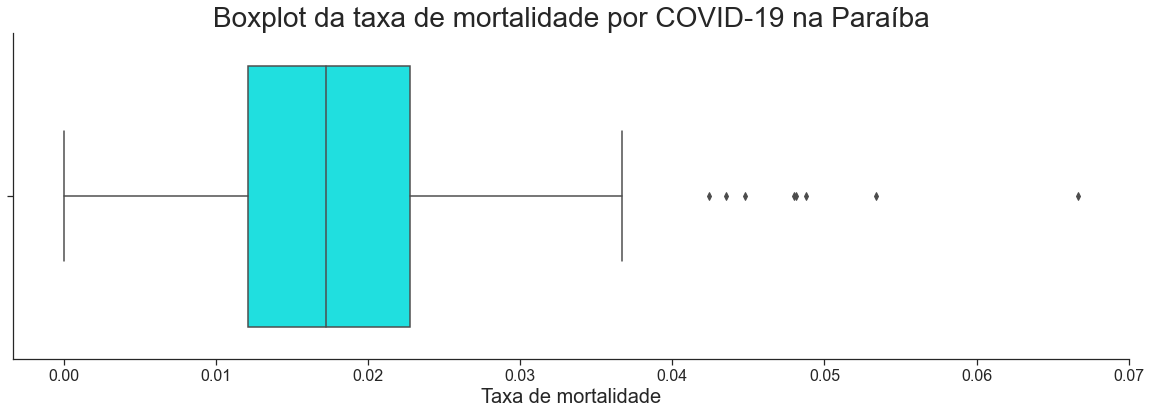

In [165]:
ax = sns.boxplot(data = casos_pb_df , x = 'death_rate', color = 'cyan')
ax.set_title('Boxplot da taxa de mortalidade por COVID-19 na Paraíba', fontsize = 28)
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('Taxa de mortalidade', fontsize = 20)
ax.tick_params(labelsize = 16)

In [166]:
casos_pb_df[casos_pb_df.death_rate > 0.04]['death_rate'].count()

8

Observando o boxplot da mortalidade, vemos que há 8 municípios onde a COVID-19 foi anormalmente mais mortal do que no resto da Paraíba.

## Comparação com o cenário brasileiro

Agora, iremos analisar como esses dados da COVID-19 na Paraíba se comparam com o resto do Brasil.

Utilizaremos o mesmo modelo de dataset, desta vez que inclui todos os municípios do país

In [167]:
casos_br_df.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-26,PI,Acauã,city,228,2,True,7102.0,2200053.0,3210.36328,0.0088
1,2022-03-26,PI,Agricolândia,city,829,10,True,5131.0,2200103.0,16156.69460,0.0121
2,2022-03-26,PI,Água Branca,city,1702,77,True,17470.0,2200202.0,9742.41557,0.0452
3,2022-03-26,PI,Alagoinha do Piauí,city,402,13,True,7665.0,2200251.0,5244.61840,0.0323
4,2022-03-26,PI,Alegrete do Piauí,city,553,9,True,4918.0,2200277.0,11244.40830,0.0163


In [168]:
casos_br_df.describe()

,confirmed,deaths,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,5589.000000,5589.000000,5.570000e+03,5.570000e+03,5570.000000,5589.000000
mean,4213.793165,110.104312,3.801718e+04,3.253591e+06,11403.035463,0.022913
std,20947.540060,810.330564,2.228930e+05,9.849103e+05,6275.323937,0.014855
min,0.000000,0.000000,7.760000e+02,1.100015e+06,178.954900,0.000000
25%,518.000000,9.000000,5.442250e+03,2.512126e+06,6962.299600,0.013900
50%,1085.000000,22.000000,1.166550e+04,3.146280e+06,10347.400315,0.020300
75%,2635.000000,54.000000,2.566375e+04,4.119190e+06,14449.463822,0.028500
max,976214.000000,39352.000000,1.232523e+07,5.300108e+06,51915.708810,0.266700


Quanto à média de casos, a brasileira é 4213.79 e a paraibana é 1930.98 (Paraíba bem abaixo da média nacional).

Quanto à média de mortes, a brasileira é 110.10 e a paraibana é 40.97 (Paraíba bem abaixo da média nacional).

Quanto à média de casos a cada 100 mil habitantes, a brasileira é 11403.03 e a paraibana é 9242.32 (Paraíba um tanto abaixo da média nacional).

Quanto à mortalidade média, a brasileira é 0.0229 e a paraibana é 0.0185 (Paraíba um tanto abaixo da média nacional).

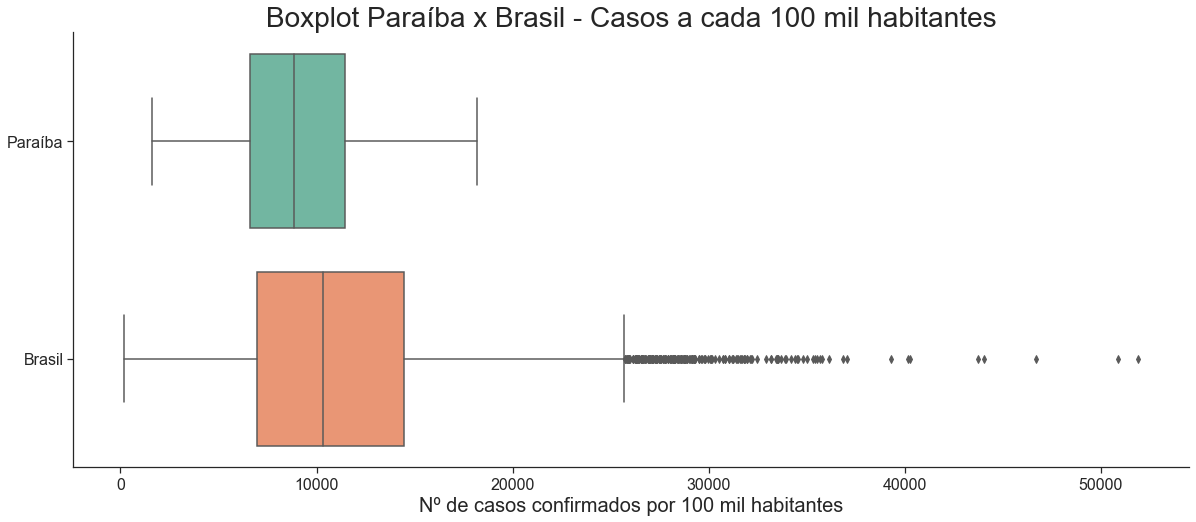

In [169]:
data_cp100k = [casos_pb_df.confirmed_per_100k_inhabitants, casos_br_df.confirmed_per_100k_inhabitants]
headers_cp100k = ['Paraíba', 'Brasil']

compare_cp100k = pd.concat(data_cp100k, axis = 1, keys = headers_cp100k)

bp_cp100k = sns.boxplot(data = compare_cp100k, orient = 'h', palette = 'Set2', order = ['Paraíba', 'Brasil'])
bp_cp100k.set_title('Boxplot Paraíba x Brasil - Casos a cada 100 mil habitantes', fontsize = 28)
bp_cp100k.set_xlabel('Nº de casos confirmados por 100 mil habitantes', fontsize = 20)
bp_cp100k.figure.set_size_inches(20, 8)
bp_cp100k.tick_params(labelsize = 16)

Vemos que, quanto aos casos a cada 100 mil habitantes, a Paraíba ficou bem, comparada ao cenário nacional. Os valores de primeiro quartil são aproximadamente iguais e os de mediana são muito próximos. O terceiro quartil do boxplot paraibano já fica um pouco mais atrás do nacional, e não há presença de outliers, ao contrário do outro.

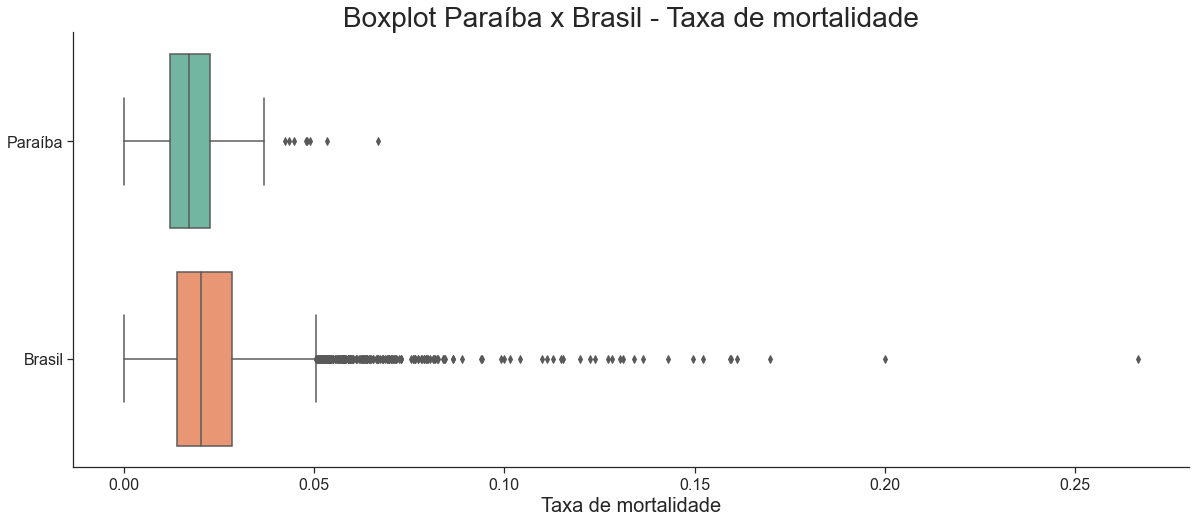

In [170]:
data_dr = [casos_pb_df.death_rate, casos_br_df.death_rate]
headers_dr = ['Paraíba', 'Brasil']

compare_dr = pd.concat(data_dr, axis = 1, keys = headers_dr)

bp_dr = sns.boxplot(data = compare_dr, orient = 'h', palette = 'Set2', order = ['Paraíba', 'Brasil'])
bp_dr.set_title('Boxplot Paraíba x Brasil - Taxa de mortalidade', fontsize = 28)
bp_dr.set_xlabel('Taxa de mortalidade', fontsize = 20)
bp_dr.figure.set_size_inches(20, 8)
bp_dr.tick_params(labelsize = 16)

Já para o boxplot da variável mortalidade, o gráfico paraibano se assemelha mais ao brasileiro. Nele, podemos observar a presença de municípios paraibanos que são outliers não só a nível estadual, mas também a nível nacional.

Como temos valores outliers para a mortalidade, mas não para a quantidade de casos a cada 100 mil habitantes, podemos concluir que existem na Paraíba municípios onde a mortalidade pela COVID-19 foi desproporcional à quantidade de casos.